In [1]:
# import required libraries
import numpy as np 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt 
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [4]:
# load daliac
def load_daliac():
    # read daliac file for k in range(0,19):
     for k in range(0,19):
        df = pd.read_csv('daliac/dataset_' + str(k + 1) + '.txt', sep=',', header=None)
        print('Dataset ' + str(k + 1) + ' has %d values.' % len(df))
load_daliac()

Dataset 1 has 245576 values.
Dataset 2 has 301901 values.
Dataset 3 has 245985 values.
Dataset 4 has 248239 values.
Dataset 5 has 254178 values.
Dataset 6 has 224073 values.
Dataset 7 has 261959 values.
Dataset 8 has 231653 values.
Dataset 9 has 248855 values.
Dataset 10 has 242709 values.
Dataset 11 has 240251 values.
Dataset 12 has 254794 values.
Dataset 13 has 246190 values.
Dataset 14 has 244144 values.
Dataset 15 has 241272 values.
Dataset 16 has 255201 values.
Dataset 17 has 239838 values.
Dataset 18 has 229396 values.
Dataset 19 has 230628 values.


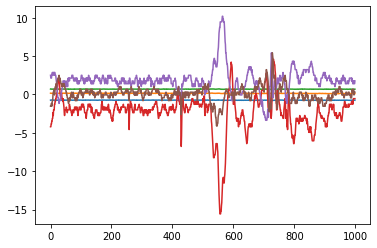

In [5]:
def data_visulization():
    activities = ['sitting', 'lying', 'standing', 'washing_dishes', 'vacuuming', 'sweeping', 'walking', 'ascending_stairs', 'descending_stairs', 'running', 'bicycling_50w', 'bicycling_100w', 'jumping']
    # read daliac file for k in range(0,19):
    for k in range(0,19):
        df = pd.read_csv('daliac/dataset_' + str(k + 1) + '.txt', sep=',', header=None)

    df_sitting = df[df[24] == 1].values
    df_lying = df[df[24] == 2].values
    df_standing = df[df[24] == 3].values
    df_washing_dishes = df[df[24] == 4].values
    df_vacuuming = df[df[24] == 5].values
    df_sweeping = df[df[24] == 6].values
    df_walking = df[df[24] == 7].values
    df_ascending_stairs = df[df[24] == 8].values
    df_descending_stairs = df[df[24] == 9].values
    df_running = df[df[24] == 10].values
    df_bicycling_50w = df[df[24] == 11].values
    df_bicycling_100w = df[df[24] == 12].values
    df_jumping = df[df[24] == 13].values
    
    # Accelerometer 
    plt.plot(df_sitting[500:1500, 0:3])
    #plt.plot(df_lying[500:1500, 0:3])
    #plt.plot(df_standing[500:1500, 0:3])
    #plt.plot(df_washing_dishes[500:1500, 0:3])
    #plt.plot(df_vacuuming[500:1500, 0:3])
    #plt.plot(df_sweeping[500:1500, 0:3])
    #plt.plot(df_walking[500:1500, 0:3])
    #plt.plot(df_ascending_stairs[500:1500, 0:3])
    #plt.plot(df_descending_stairs[500:1500, 0:3])
    #plt.plot(df_running[500:1500, 0:3])
    #plt.plot(df_bicycling_50w[500:1500, 0:3])
    #plt.plot(df_bicycling_100w[500:1500, 0:3])
    #plt.plot(df_jumping[500:1500, 0:3])
    
    #Gyroscope
    plt.plot(df_sitting[500:1500, 3:6])
    #plt.plot(df_lying[500:1500, 3:6])
    #plt.plot(df_standing[500:1500, 3:6])
    #plt.plot(df_washing_dishes[500:1500, 3:6])
    #plt.plot(df_vacuuming[500:1500, 3:6])
    #plt.plot(df_sweeping[500:1500, 3:6])
    #plt.plot(df_walking[500:1500, 3:6])
    #plt.plot(df_ascending_stairs[500:1500, 3:6])
    #plt.plot(df_descending_stairs[500:1500, 3:6])
    #plt.plot(df_running[500:1500, 3:6])
    #plt.plot(df_bicycling_50w[500:1500, 3:6])
    #plt.plot(df_bicycling_100w[500:1500, 3:6])
    #plt.plot(df_jumping[500:1500, 3:6])
    
    plt.show()
data_visulization()

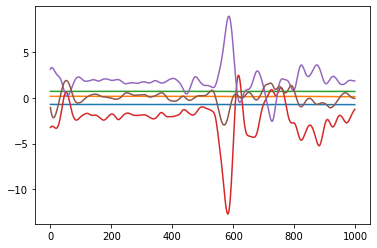

In [6]:
def removal_of_noise():
    # implementing butterworth 'low-pass' filter. 
    b, a = signal.butter(4, 0.04, 'low', analog=False)
    # read daliac file for k in range(0,19):
    for k in range(0,19):
        df = pd.read_csv('daliac/dataset_' + str(k + 1) + '.txt', sep=',', header=None)
    
        df_sitting = df[df[24] == 1].values
        df_lying = df[df[24] == 2].values
        df_standing = df[df[24] == 3].values
        df_washing_dishes = df[df[24] == 4].values
        df_vacuuming = df[df[24] == 5].values
        df_sweeping = df[df[24] == 6].values
        df_walking = df[df[24] == 7].values
        df_ascending_stairs = df[df[24] == 8].values
        df_descending_stairs = df[df[24] == 9].values
        df_running = df[df[24] == 10].values
        df_bicycling_50w = df[df[24] == 11].values
        df_bicycling_100w = df[df[24] == 12].values
        df_jumping = df[df[24] == 13].values
        
    for i in range(0,3):
        df_sitting[:,i] = signal.lfilter(b, a, df_sitting[:, i])
        df_lying[:,i] = signal.lfilter(b, a, df_lying[:, i])
        df_standing[:,i] = signal.lfilter(b, a, df_standing[:, i])
        df_washing_dishes[:,i] = signal.lfilter(b, a, df_washing_dishes[:, i])
        df_vacuuming[:,i] = signal.lfilter(b, a, df_vacuuming[:, i])
        df_sweeping[:,i] = signal.lfilter(b, a, df_sweeping[:, i])
        df_walking[:,i] = signal.lfilter(b, a, df_walking[:, i])
        df_ascending_stairs[:,i] = signal.lfilter(b, a, df_ascending_stairs[:, i])
        df_descending_stairs[:,i] = signal.lfilter(b, a, df_descending_stairs[:, i])
        df_running[:,i] = signal.lfilter(b, a, df_running[:, i])
        df_bicycling_50w[:,i] = signal.lfilter(b, a, df_bicycling_50w[:, i])
        df_bicycling_100w[:,i] = signal.lfilter(b, a, df_bicycling_100w[:, i])
        df_jumping[:,i] = signal.lfilter(b, a, df_jumping[:, i])
    for y in range(3,6):
        df_sitting[:,y] = signal.lfilter(b, a, df_sitting[:, y])
        df_lying[:,y] = signal.lfilter(b, a, df_lying[:, y])
        df_standing[:,y] = signal.lfilter(b, a, df_standing[:, y])
        df_washing_dishes[:,y] = signal.lfilter(b, a, df_washing_dishes[:, y])
        df_vacuuming[:,y] = signal.lfilter(b, a, df_vacuuming[:, y])
        df_sweeping[:,y] = signal.lfilter(b, a, df_sweeping[:, y])
        df_walking[:,y] = signal.lfilter(b, a, df_walking[:, y])
        df_ascending_stairs[:,y] = signal.lfilter(b, a, df_ascending_stairs[:, y])
        df_descending_stairs[:,y] = signal.lfilter(b, a, df_descending_stairs[:, y])
        df_running[:,y] = signal.lfilter(b, a, df_running[:, y])
        df_bicycling_50w[:,y] = signal.lfilter(b, a, df_bicycling_50w[:, y])
        df_bicycling_100w[:,y] = signal.lfilter(b, a, df_bicycling_100w[:, y])
        df_jumping[:,y] = signal.lfilter(b, a, df_jumping[:, y])
        

    #Accelerometer
    plt.plot(df_sitting[500:1500, 0:3])
    #plt.plot(df_lying[500:1500, 0:3])
    #plt.plot(df_standing[500:1500, 0:3])
    #plt.plot(df_washing_dishes[500:1500, 0:3])
    #plt.plot(df_vacuuming[500:1500, 0:3])
    #plt.plot(df_sweeping[500:1500, 0:3])
    #plt.plot(df_walking[500:1500, 0:3])
    #plt.plot(df_ascending_stairs[500:1500, 0:3])
    #plt.plot(df_descending_stairs[500:1500, 0:3])
    #plt.plot(df_running[500:1500, 0:3])
    #plt.plot(df_bicycling50w[500:1500, 0:3])
    #plt.plot(df_bicycling100w[500:1500, 0:3])
    #plt.plot(df_rjumping[500:1500, 0:3])
    
    #Gyroscope
    plt.plot(df_sitting[500:1500, 3:6])
    #plt.plot(df_lying[500:1500, 3:6])
    #plt.plot(df_standing[500:1500, 3:6])
    #plt.plot(df_washing_dishes[500:1500, 3:6])
    #plt.plot(df_vacuuming[500:1500, 3:6])
    #plt.plot(df_sweeping[500:1500, 3:6])
    #plt.plot(df_walking[500:1500, 3:6])
    #plt.plot(df_ascending_stairs[500:1500, 3:6])
    #plt.plot(df_descending_stairs[500:1500, 3:6])
    #plt.plot(df_running[500:1500, 3:6])
    #plt.plot(df_bicycling_50w[500:1500, 3:6])
    #plt.plot(df_bicycling_100w[500:1500, 3:6])
    #plt.plot(df_jumping[500:1500, 3:6])
    
    plt.show()
removal_of_noise()

In [12]:
def feature_engineering():
    training = np.empty(shape=(0, 73))
    testing = np.empty(shape=(0, 73))
    # deal with each dataset file
    for j in range(0,19):
        df = pd.read_csv('daliac/dataset_' + str(j + 1) + '.txt', sep=',', header=None)
        print('Deal with dataset ' + str(j + 1))
        for a in range(1, 14):
            act = df[df[24] == a].values
            x, y = signal.butter(4, 0.04, 'low', analog=False)
            for k in range(24):
                act[:, k] = signal.lfilter(x, y, act[:, k])
            
            length = len(act)
            size_training = math.floor(length * 0.8)
            val_train = act[:size_training, :]
            val_test = act[size_training:, :]

            sample_train = size_training // 1000 + 1
            sample_test = (length - size_training) // 1000 + 1

            for c in range(sample_train):
                if c < sample_train - 1:
                    sample = val_train[1000*c:1000*(c + 1), :]
                else:
                    sample = val_train[1000*c:, :]
                 

                features = []
                for i in range(24):
                    features.append(np.min(sample[:, i]))
                    features.append(np.max(sample[:, i]))
                    features.append(np.mean(sample[:, i]))
                features.append(sample[0, -1])
                features = np.array([features])
                training = np.concatenate((training, features), axis=0)
            
            for c in range(sample_test):
                if c < sample_train - 1:
                    sample = val_test[1000*c:1000*(c + 1), :]
                else:
                    sample = val_test[1000*c:, :]

                features = []
                for i in range(24):
                    features.append(np.min(sample[:, i]))
                    features.append(np.max(sample[:, i]))
                    features.append(np.mean(sample[:, i])) 
                features.append(sample[0, -1])
                features = np.array([features])
                testing = np.concatenate((testing, features), axis=0)

    df_training = pd.DataFrame(training)
    df_testing = pd.DataFrame(testing)
    df_training.to_csv('training_data.csv', index=None, header=None)
    df_testing.to_csv('testing_data.csv', index=None, header=None)
feature_engineering()

Deal with dataset 1
Deal with dataset 2
Deal with dataset 3
Deal with dataset 4
Deal with dataset 5
Deal with dataset 6
Deal with dataset 7
Deal with dataset 8
Deal with dataset 9
Deal with dataset 10
Deal with dataset 11
Deal with dataset 12
Deal with dataset 13
Deal with dataset 14
Deal with dataset 15
Deal with dataset 16
Deal with dataset 17
Deal with dataset 18
Deal with dataset 19


In [ ]:
def training_and_evaluation():
    df_training = pd.read_csv('training_data.csv', header=None)
    df_testing = pd.read_csv('testing_data.csv', header=None)

    y_train = df_training[df_testing.shape[1]-1].values
    
    y_train = y_train - 1
    df_training = df_training.drop([df_testing.shape[1]-1], axis=1)
    X_train = df_training.values

    y_test = df_testing[df_testing.shape[1]-1].values
    y_test = y_test - 1
    df_testing = df_testing.drop([df_testing.shape[1]-1], axis=1)
    X_test = df_testing.values
    
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    
    KNN = KNeighborsClassifier(n_neighbors=3)
    KNN.fit(X_train, y_train)

    
    y_pred = KNN.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    
    print(confusion_matrix(y_test, y_pred))
    

    
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1,1e-2, 1e-3, 1e-4],
                     'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 100]},
                    {'kernel': ['linear'], 'C': [1e-3, 1e-2, 1e-1, 1, 10, 100]}]
    acc_scorer = make_scorer(accuracy_score)
    grid_obj  = GridSearchCV(SVC(), tuned_parameters, cv=10, scoring=acc_scorer)
    grid_obj  = grid_obj .fit(X_train, y_train)
    clf = grid_obj.best_estimator_
    print('best clf:', clf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

)
training_and_evaluation()

In [ ]:
if __name__ == '__main__':
    
    data_visulization()
    removal_of_noise()
    feature_engineering()
    model_training_and_evaluation_example()